<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/practicando_DS_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
df_wine= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [34]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinnity of ash', 'magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoids phenols', 'Proanthocyanins', 'color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'proline']

In [35]:
#distintos clases de etiquetas
import numpy as np
print('Valor de las etiquetas de clase', np.unique(df_wine['Class label']))

Valor de las etiquetas de clase [1 2 3]


In [36]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinnity of ash,magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
#Comprobando valores nulos
df_wine.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinnity of ash              0
magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoids phenols           0
Proanthocyanins                 0
color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

In [38]:
#representación por etiquetas
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [39]:
#subdividir el dataframe en datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)

In [40]:
#vamos a estandarizar los datos
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train_std = standardScaler.fit_transform(X_train)
X_test_std = standardScaler.transform(X_test)


In [41]:
#probando coon penalizacón L1
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty='l1', C=1.0, solver='saga')
lg.fit(X_train_std, y_train)
print("exactitud del entrenamiento", lg.score(X_train_std, y_train))
print("exactitud del testeo", lg.score(X_test_std, y_test))

exactitud del entrenamiento 1.0
exactitud del testeo 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
#Accediendo a las terminos de intercepcion
lg.intercept_

array([ 0.42980905,  0.60160731, -1.03141636])

In [43]:
#coeficientes del modelo.
lg.coef_

array([[ 0.30010849,  0.        ,  0.        , -0.75094768,  0.        ,
         0.        ,  0.34129476,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26149918,  0.9874065 ],
       [-1.30235158, -0.36076684, -0.911558  ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.10880084,
         0.49030924,  0.        , -1.40931706],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.0567189 ,  0.        ,  0.        ,  0.19907794,
        -0.64514342, -0.94950468,  0.        ]])

### La matriz de pesos a la cual hemos accedido mediante el atributo coef_ contiene tres filas de coeficientes de pesos, un vector de peso para cada clase. Cada fila consiste de 13 pesos donde cada uno esta multiplicado por la correspondiente caracteristica e el conjunto de datos wine de 13 dimensiones para calcular la entrada neta.

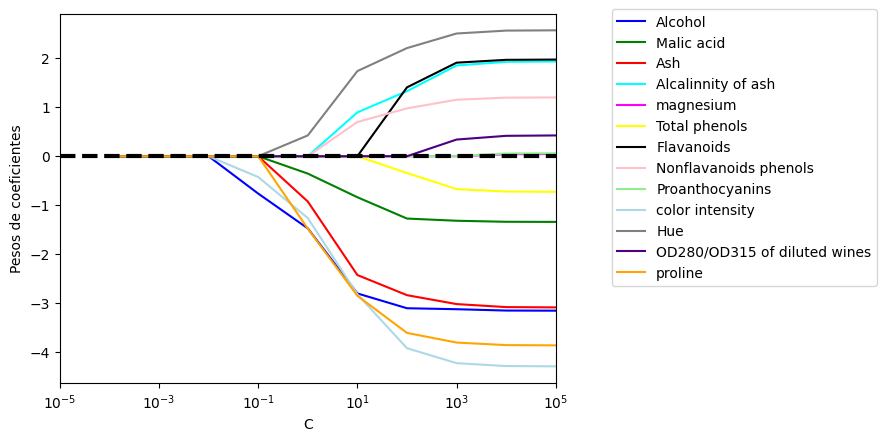

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors =["blue", "green", "red", "cyan",
         "magenta","yellow", "black", "pink",
         "lightgreen","lightblue","gray","indigo","orange"]
weights, params = [], []
for c in np.arange(-4., 6.):
  lr= LogisticRegression(penalty='l1', C=10.**c, solver='saga', random_state=0, max_iter=10000)#Con max_iter=10000 logramos que algoritmo conevrga.
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column], label=df_wine.columns[column +1 ], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Pesos de coeficientes')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03),
          fancybox=True)
plt.show()


## Crearemos un un algoritmo de selección de caracteristicas secuenciales clásico. El Seleccción Secuencial Hacia atras SBS(del ingles secuential backward selection).

In [45]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features, scoring= accuracy_score, test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= self.test_size, random_state= self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_= [score]
    while dim> self.k_features :
      scores =[]
      subsets = []
      for p in combinations(self.indices_, r=dim-1):
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim-=1
      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]
    return self

  def transform(self, X):
    return X[:, self.indices_]
  def _calc_score(self,X_train, y_train, X_test, y_test, indices ):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score


In [46]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)


In [47]:
k_feat= [len(k) for k in sbs.subsets_]

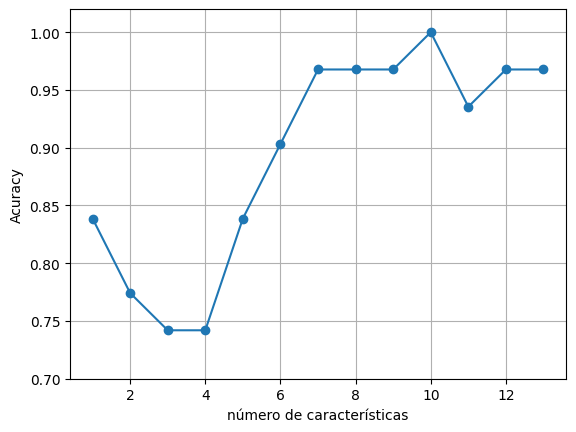

In [48]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Acuracy')
plt.xlabel('número de características')
plt.grid()
plt.show()

In [49]:
k3=list(sbs.subsets_[6])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinnity of ash', 'magnesium',
       'Total phenols', 'Flavanoids'],
      dtype='object')


In [50]:
# Reduciendo el dataset a 7 caracteristicas en lugar de 13, cobtenemos una precisión del 94,5%
knn.fit(X_train_std[:,k3], y_train)
print(knn.score(X_test_std[:,k3], y_test))

0.9444444444444444


In [51]:
#con el dataset completo( las 13 caracteristicas) tendríamos una precisión del 96,3%
knn.fit(X_train_std, y_train)
print(knn.score(X_test_std, y_test))

0.9629629629629629


## Con el ejemplo anterior logramos reducir de 13 dimensiones a solamente 7, con una perdida mínima del 1.8% en la precisión del modelo.

#Evaluar la importancia de caracteristicas con bosuqes aleatorios.

## Mediante un bosque aleatorio podemos medir la importancia de la caraterisitica sin realizar suposiciones de que nuestros datos son separables linealmente o no. La implementación de scikit-learn ya recoge los valores de la importancia de las caracterisiticas y podemos acceder a ellos mediante el atributo feature_importances_ después de ajustar el clasificador.   

In [52]:
from sklearn.ensemble import RandomForestClassifier
etiquetas = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importancia = forest.feature_importances_
indices = np.argsort(importancia)[::-1]

In [53]:
print("\t\t importancia de caracterisitcas: \n\n")
for f in range(X_train.shape[1]):
  print('\t %2d) %-*s %f'%(f+1, 40,
                        etiquetas[indices[f]],
                        importancia[indices[f]]))

		 importancia de caracterisitcas: 


	  1) proline                                  0.185453
	  2) Flavanoids                               0.174751
	  3) color intensity                          0.143920
	  4) OD280/OD315 of diluted wines             0.136162
	  5) Alcohol                                  0.118529
	  6) Hue                                      0.058739
	  7) Total phenols                            0.050872
	  8) magnesium                                0.031357
	  9) Malic acid                               0.025648
	 10) Proanthocyanins                          0.025570
	 11) Alcalinnity of ash                       0.022366
	 12) Nonflavanoids phenols                    0.013354
	 13) Ash                                      0.013279


## Graficando los resultados.

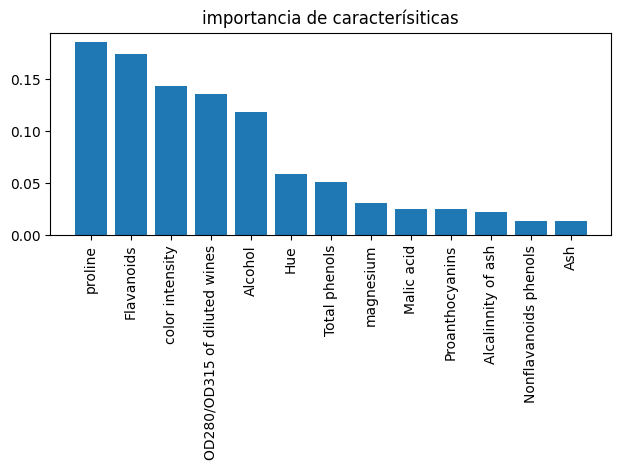

In [54]:
plt.title('importancia de caracterísiticas')
plt.bar(range(X_train.shape[1]), importancia[indices], align='center')
plt.xticks(range(X_train.shape[1]), etiquetas[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Scikit-learn también implementa un objeto SelectFromModel que selecciona características basadas en un umbral definido por el usuario.

In [55]:
# Seleccionando las caracterisicas que obtengan una puntuacion 0.1 o mayor
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('número de muestras que coninciden con el criterio: ', X_selected.shape[0])

número de muestras que coninciden con el criterio:  124


In [56]:
print("\t\t importancia de caracterisitcas: \n\n")
for f in range(X_selected.shape[1]):
  print('\t %2d) %-*s %f'%(f+1, 40,
                        etiquetas[indices[f]],
                        importancia[indices[f]]))

		 importancia de caracterisitcas: 


	  1) proline                                  0.185453
	  2) Flavanoids                               0.174751
	  3) color intensity                          0.143920
	  4) OD280/OD315 of diluted wines             0.136162
	  5) Alcohol                                  0.118529


# Comprimir datos mediante la reducción de dimensionalidad.
## Análisis de componentes principales.

### Si utlizamos ACP para reducción de dimensionalidad, construimos una matriz $W$ de transformación de $d$ X $k$ dimensiones que nos permite mapear un vector $x$ de muestra en un subespacio de características de $K$ dimensiones con menos dimensiones que el espacio de caracteristicas de $D$ dimensiones original.
### Las direcciones ACP son sensibles al escalado de datos y necesitamos estandarizar las características antes que el ACP.  

### Vamos a resumir los pasos del Algoritmo ACP
1. Estandarizar el conjunto de datos.
2. Construir la matriz de covarianza.
3. Descomprimir la matriz en autovectores y autovalores.
4. Ordenar los autovalores por orden decreciente para clasifiicar los autovectores.
5. Seleccionar $k$ autovectoresque corresponden a los $k$ autovalores mayores, donde $k$ es la dimensionalidad del nuevo subespacio de caracteristicas($k$ <= $d$).
6. Construir una matriz de proyección $W$ a partir de los $k$ autovectores \<top>.
7. Transformar el conjunto de datos de entrada $X$ de $d$ dimensiones para obtener el nuevo subespacio de caracteristicas de $k$ dimensiones.     

In [57]:
# Abordaremos los primeros 4 pasos del ACP.
from sklearn.model_selection import train_test_split
X, Y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)

In [58]:
#estandarizar las caracteristicas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std = scaler.fit(X_test)

### Despúes de completar el preprocesamiento anterior pasamos al segundo paso: Construir la matriz de covarianza $d$ X $d$ dimensiónes simétricas. los autovetores representan los componenetes principales, mientras que los autovalores definen su mágnitud

In [59]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
valores_propios, valores_vectoriales = np.linalg.eig(cov_mat)
print('\n Valores propios \n%s'%valores_propios)


 Valores propios 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [60]:
tot = sum(valores_propios)
var_exp = [(i / tot) for i in sorted(valores_propios, reverse=True)]
cum_var_exp= np.cumsum(var_exp)

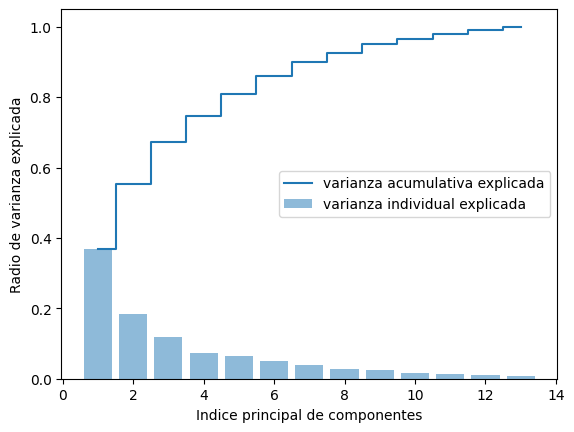

In [61]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='varianza individual explicada')
plt.step(range(1,14), cum_var_exp, where='mid', label='varianza acumulativa explicada')
plt.ylabel('Radio de varianza explicada')
plt.xlabel('Indice principal de componentes')
plt.legend(loc='best')
plt.show()